In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from os import listdir
import os

# Parse the data file to obtain the raw data

In [42]:
path = '/Users/ziegler/p8/psu_data/vna_data/24G_dipole_charac/'
dat={}
pos=[]
for f in listdir(path):
    #print(os.path.splitext(f))
    pos.append(int(os.path.splitext(f)[0]))
sorted_index=np.argsort(pos)
sort_pos=np.sort(pos)
for i,k in enumerate(listdir(path)):
    #print(k)
    dat.update({sort_pos[i]:{'s32':{'db':[],'deg':[]},'s42':{'db':[],'deg':[]},'f':[]}})
    #print(path+str(sort_pos[i])+'.csv')
    with open(path+str(sort_pos[i])+'.csv') as infile:
        for j,l in enumerate(csv.reader(infile)):
            #print(j,l)
            if j>6:
                try:
                    dat[sort_pos[i]]['f'].append(float(l[0]))
                    dat[sort_pos[i]]['s32']['db'].append(float(l[7]))
                    dat[sort_pos[i]]['s32']['deg'].append(float(l[8]))
                    dat[sort_pos[i]]['s42']['db'].append(float(l[13]))
                    dat[sort_pos[i]]['s42']['deg'].append(float(l[14]))
                except ValueError:
                    continue
                except IndexError:
                    continue
print(dat.keys())

dict_keys([0, 10, 20, 30, 40, 50, 60, 65, 70, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175])


# Plot Moving Antenna (S32) and Reference Antenna (S42) over Frequency

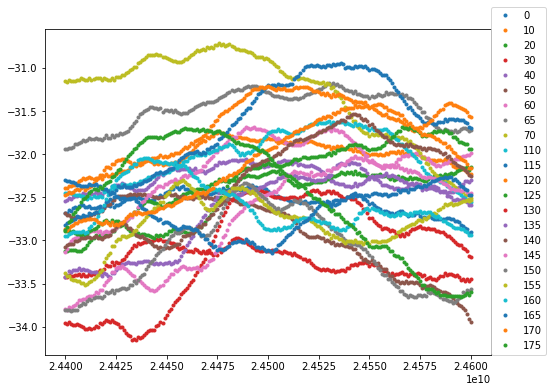

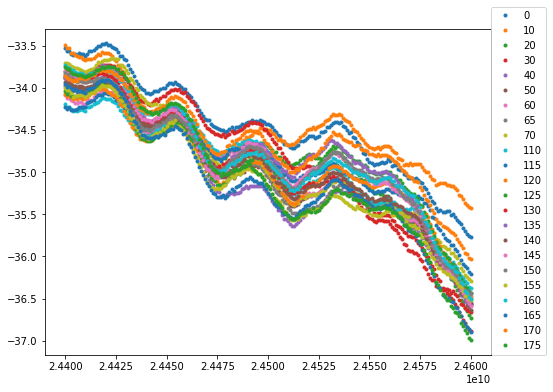

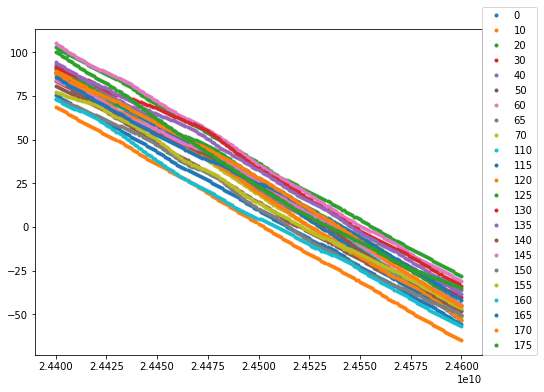

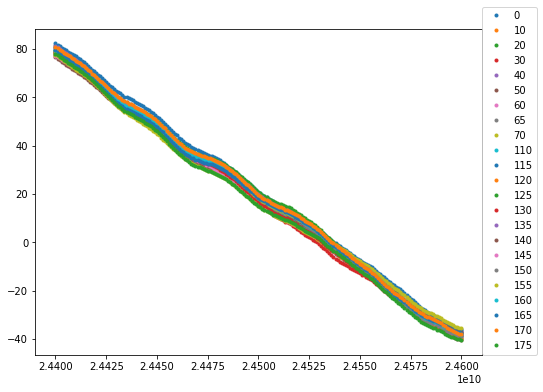

In [54]:
plt.figure(figsize=(8,6))
for i in sort_pos:
    plt.plot(dat[0]['f'],dat[i]['s32']['db'],'.',label=i)
plt.legend(loc=(1,0))
plt.figure(figsize=(8,6))
for i in sort_pos:
    plt.plot(dat[0]['f'],dat[i]['s42']['db'],'.',label=i)
plt.legend(loc=(1,0))
plt.figure(figsize=(8,6))
for i in sort_pos:
    plt.plot(dat[0]['f'],dat[i]['s32']['deg'],'.',label=i)
plt.legend(loc=(1,0))
plt.figure(figsize=(8,6))
for i in sort_pos:
    plt.plot(dat[0]['f'],dat[i]['s42']['deg'],'.',label=i)
plt.legend(loc=(1,0))

(array([2., 1., 2., 2., 1., 6., 3., 2., 2., 2.]),
 array([14.918261 , 15.5257998, 16.1333386, 16.7408774, 17.3484162,
        17.955955 , 18.5634938, 19.1710326, 19.7785714, 20.3861102,
        20.993649 ]),
 <a list of 10 Patch objects>)

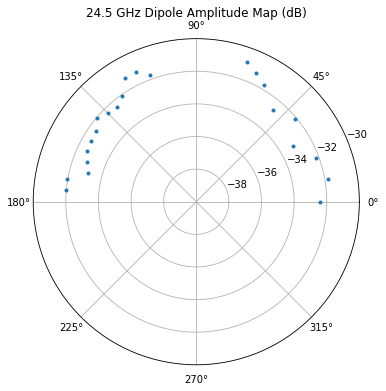

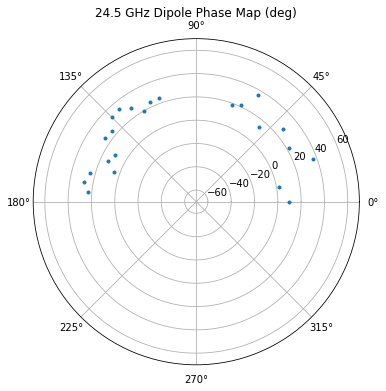

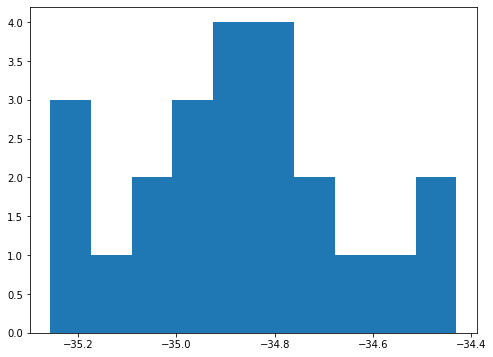

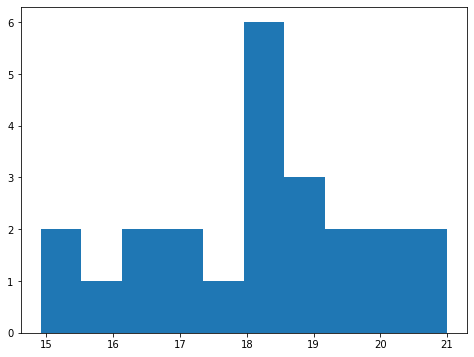

In [104]:
f=24.5e9
s32_db=[]
s42_db=[]
s32_deg=[]
s42_deg=[]
f_index=np.where(np.array(dat[0]['f'])-f==0)[0][0]
#print(f_index)
for i in sort_pos:
    s32_db.append(dat[i]['s32']['db'][f_index])
    s32_deg.append(dat[i]['s32']['deg'][f_index])
    s42_db.append(dat[i]['s42']['db'][f_index])
    s42_deg.append(dat[i]['s42']['deg'][f_index])
    
plt.figure(figsize=(6,6))
plt.polar(np.radians(sort_pos),s32_db,'.')
plt.ylim(-40,-30)
plt.title('24.5 GHz Dipole Amplitude Map (dB)')
#plt.ylabel('dB')


plt.figure(figsize=(8,6))
plt.polar(np.radians(sort_pos),s32_deg,'.')
plt.ylim(-70,70)
plt.title('24.5 GHz Dipole Phase Map (deg)')
#plt.ylabel('deg')



plt.figure(figsize=(8,6))
plt.hist(s42_db,bins=10)
#plt.ylim(-40,-30)

plt.figure(figsize=(8,6))
plt.hist(s42_deg,bins=10)
#plt.ylim(0,40)
#print(dat[0]['f'])

# Plot of the unwrapped phases of S21, S31, and S41

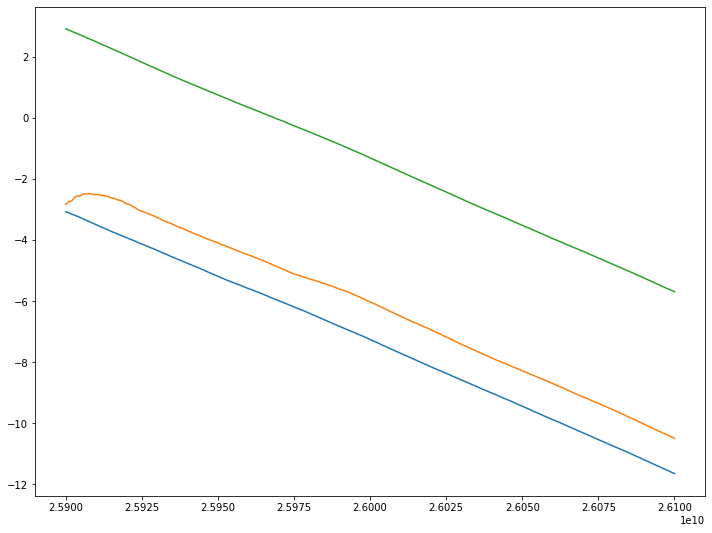

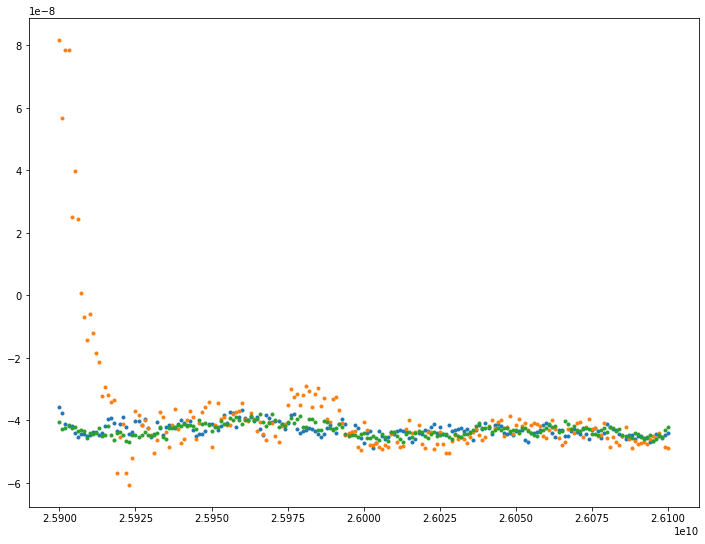

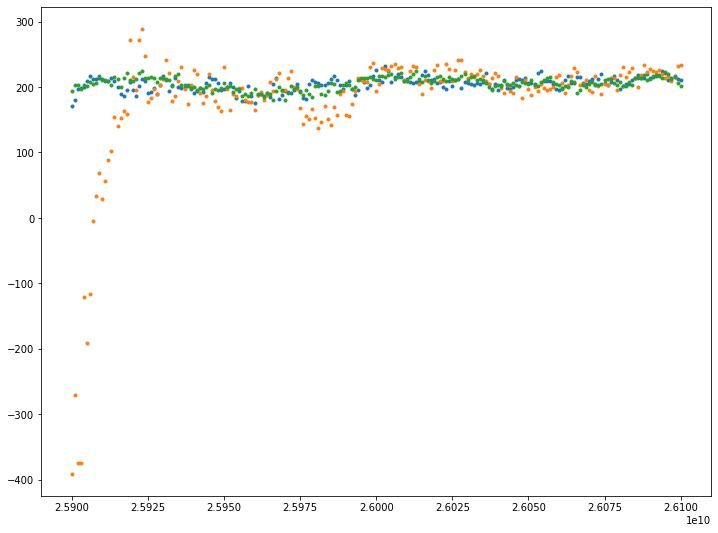

In [72]:
plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s21']['phi'])))
plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s31']['phi'])))
plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s21']['phi'])),raw_data['f']),'.')
plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f']),'.')
plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f']),'.')

r2=-np.gradient(np.unwrap(np.radians(raw_data['s21']['phi'])),raw_data['f'])*3e10/(2*np.pi) # in cm
r3=-np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f'])*3e10/(2*np.pi)
r4=-np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f'])*3e10/(2*np.pi)

plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],r2,'.')
plt.plot(raw_data['f'],r3,'.')
plt.plot(raw_data['f'],r4,'.')
#print(r2,r3,r4)

In [74]:
file='3antenna_s41_antenna_twice_as_far.csv'

raw_data1={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
#frequency_of_interest=26e9
with open(path+file) as infile:
    read=csv.reader(infile,delimiter=',')
    for row in read:
        #print(row)
        try:
            if len(row)>0:
                raw_data1['f'].append(float(row[0]))
                raw_data1['s21']['mag'].append(float(row[9]))
                raw_data1['s21']['phi'].append(float(row[10]))
                raw_data1['s31']['mag'].append(float(row[17]))
                raw_data1['s31']['phi'].append(float(row[18]))
                raw_data1['s41']['mag'].append(float(row[25]))
                raw_data1['s41']['phi'].append(float(row[26]))
                #if int(row[0])==int(frequency_of_interest):
                    
                #    raw_data.update({'s':[]})
                #    for n in row[1:]:
                #        raw_data['s'].append(float(n))
        except ValueError:
            continue

181.63853855721393 196.71372097844113


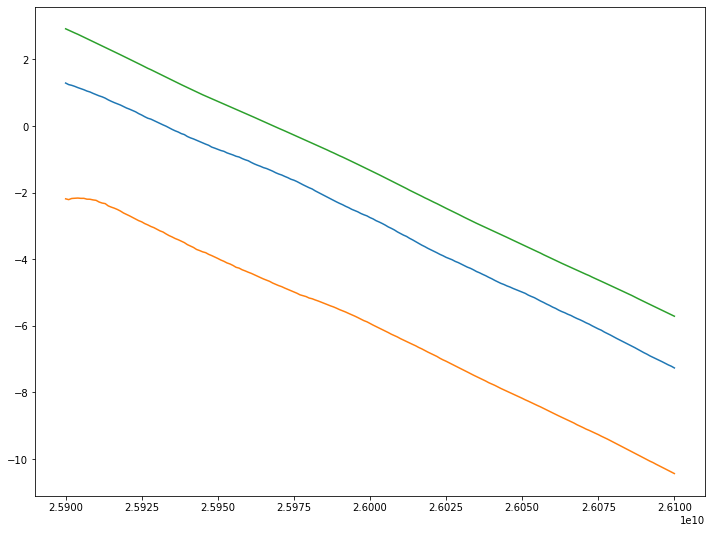

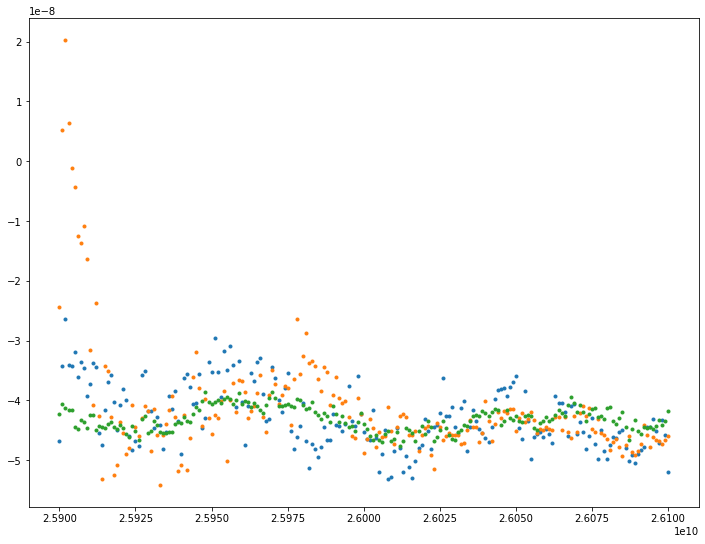

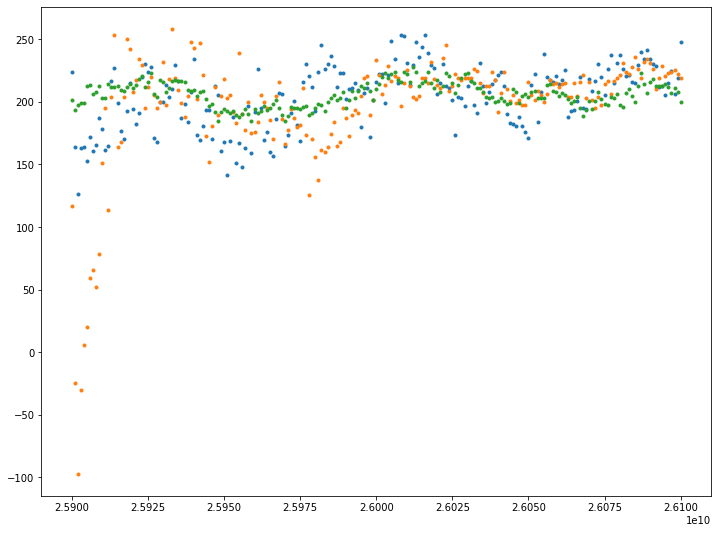

In [77]:
plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s21']['phi'])))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s31']['phi'])))
plt.plot(raw_data1['f'],np.unwrap(np.radians(raw_data1['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s21']['phi'])),raw_data1['f']),'.')
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s31']['phi'])),raw_data1['f']),'.')
plt.plot(raw_data1['f'],np.gradient(np.unwrap(np.radians(raw_data1['s41']['phi'])),raw_data1['f']),'.')

r2_1=-np.gradient(np.unwrap(np.radians(raw_data1['s21']['phi'])),raw_data1['f'])*3e10/(2*np.pi) # in cm
r3_1=-np.gradient(np.unwrap(np.radians(raw_data1['s31']['phi'])),raw_data1['f'])*3e10/(2*np.pi)
r4_1=-np.gradient(np.unwrap(np.radians(raw_data1['s41']['phi'])),raw_data1['f'])*3e10/(2*np.pi)

plt.figure(figsize=(12,9))
plt.plot(raw_data1['f'],r2_1,'.')
plt.plot(raw_data1['f'],r3_1,'.')
plt.plot(raw_data1['f'],r4_1,'.')
print(np.mean(r3),np.mean(r3_1))

# Zero pad frequencies before the starting frequency in the raw data

In [46]:
pad_data={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
for i,k in enumerate(raw_data):
    if i==0:
        pad_data['f']=np.append(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0]),raw_data['f'])
        print(k)
    else:
        for j,l in enumerate(raw_data[k]):
            print(k,l)
            pad_data[k][l]=np.append(np.zeros(len(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0])))
                                     ,raw_data[k][l])



f
s21 mag
s21 phi
s31 mag
s31 phi
s41 mag
s41 phi


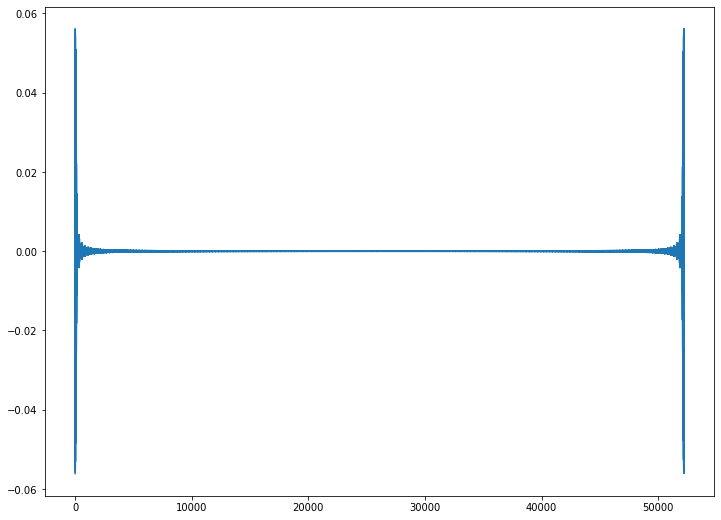

In [50]:
#plt.figure(figsize=(12,9))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s21']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s31']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(np.fft.irfft(np.unwrap(np.radians(pad_data['s21']['phi']))))

In [36]:
raw_data['f'][0]

25900000000.0